In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Load the Dataset
df = pd.read_csv('train.csv')

# Display the first few rows to confirm loading
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [2]:
print("\n--- Data Information (Data Types and Missing Values) ---")
df.info()


--- Data Information (Data Types and Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
print("\n--- Descriptive Statistics for Numerical Features ---")
print(df.describe())


--- Descriptive Statistics for Numerical Features ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
print("\n--- Value Counts for Key Categorical Features ---")
print("Survival Count:")
print(df['Survived'].value_counts())
print("\nPassenger Class Count:")
print(df['Pclass'].value_counts())


--- Value Counts for Key Categorical Features ---
Survival Count:
Survived
0    549
1    342
Name: count, dtype: int64

Passenger Class Count:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [5]:
# Fill missing 'Age' values with the median for simplicity
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' (too many missing values) and 'Ticket'/'Name' (unique identifiers)
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

print("\n--- Data Check After Handling Missing Values and Dropping Columns ---")
df.info()


--- Data Check After Handling Missing Values and Dropping Columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


C:\Users\Vedant\AppData\Local\Temp\ipykernel_13808\2347644867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Vedant\AppData\Local\Temp\ipykernel_13808\2347644867.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

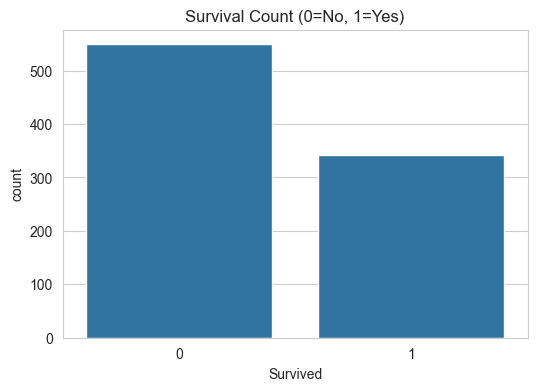

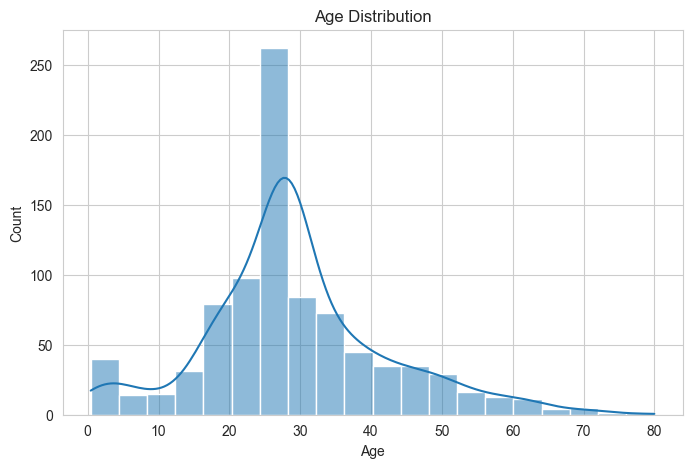

In [6]:
# Plot 1: Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0=No, 1=Yes)')
plt.show()

# Observation 1: More passengers did not survive (approx 550) than those who did (approx 340).

# Plot 2: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Observation 2: The age distribution is slightly right-skewed, with a large peak around 20-30 years (median-imputed values).

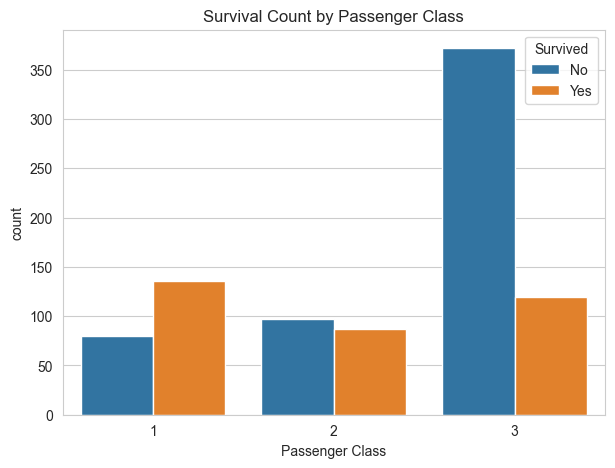

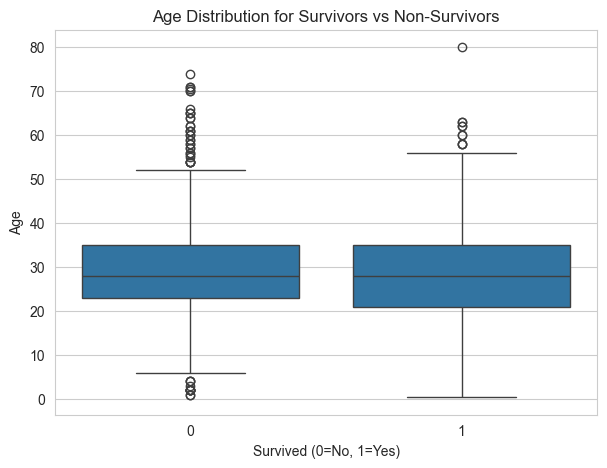

In [7]:
# Plot 3: Survival by Passenger Class (Pclass)
plt.figure(figsize=(7, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Observation 3: 1st class passengers had a significantly higher survival rate than 3rd class passengers. Pclass is a strong predictor of survival.

# Plot 4: Age Distribution by Survival (Boxplot)
plt.figure(figsize=(7, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution for Survivors vs Non-Survivors')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

# Observation 4: The median age of survivors (1) and non-survivors (0) appears similar, but non-survivors have a slightly wider distribution of ages.

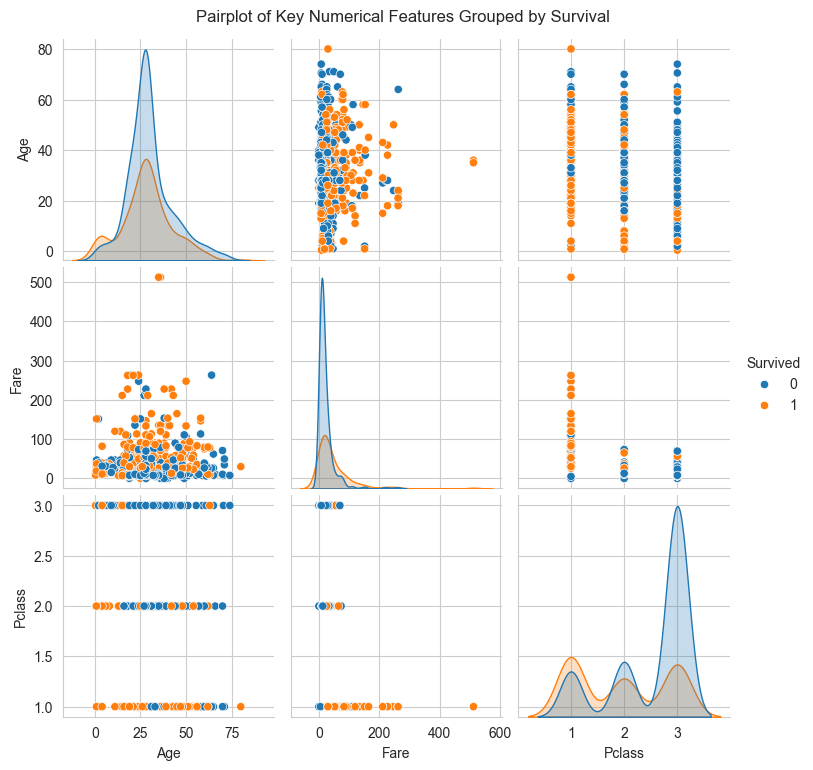

In [8]:
# Plot 6: Pairplot (can be slow, use only a few key numerical columns)
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot of Key Numerical Features Grouped by Survival', y=1.02)
plt.show()

# Observation 6: The scatterplots in the upper right/lower left confirm the trends: a clear separation between Pclass groups, and a clustering of non-survivors in the lower fare ranges.